# Multiple Linear Regression - Bike Sharing Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes aims to understand the demand for shared bikes to stand out from other service providers and make huge profits.


Essentially, the company wants —

- To identify the factors that are significant in predicting the demand for shared bikes.

- The accuracy of the model with which such factors can predict the bike demands.


## Step 1: Reading, Understanding and Visualizing the Data

In [1]:
# Importing required python libraries

# for numerical and data analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for supressing warnings
import warnings
warnings.filterwarnings(action = 'ignore')

# for model development and train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [2]:
#reading the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect various aspects of dataframe

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Performing EDA

In [6]:
#dropping redundant columns - 
#'instant' and 'dteday' (dteday info already captured in 'year' and 'mnth' col.); 
#'casual' and 'registered' (Info included in 'cnt column')

df = df.drop(['instant', 'dteday','casual', 'registered' ], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#Mapping the different levels of categorical variables based on data dictionary for visualization.

define1 = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
define2 = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
define3 = {1: 'clear', 2:'Misty', 3:'LRain', 4:'HRain'}
define4 = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df.replace({"season": define1, "mnth": define2, "weathersit": define3, "weekday": define4}, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#separating continuous variables and categorical variables for visualization

conti_vars = ["temp", "atemp", "hum", "windspeed"]
cat_vars = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
target = ["cnt"]
len(conti_vars)+len(cat_vars)+len(target)

12

### Univariate Analysis

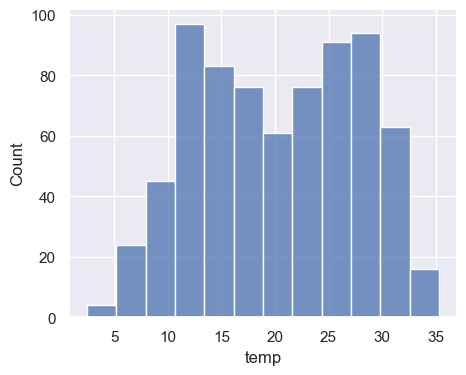

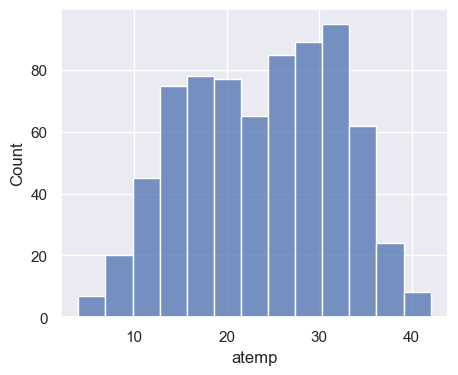

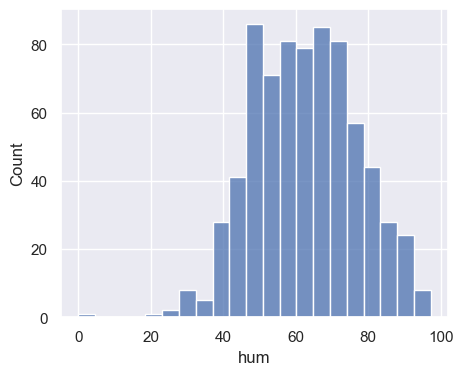

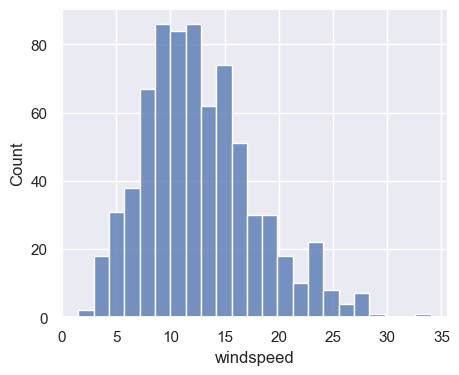

In [9]:
#distribution of quantitative variables

sns.set(rc={"figure.figsize":(5, 4)})
for i in conti_vars:
    sns.histplot(x = df[i])
    plt.show()

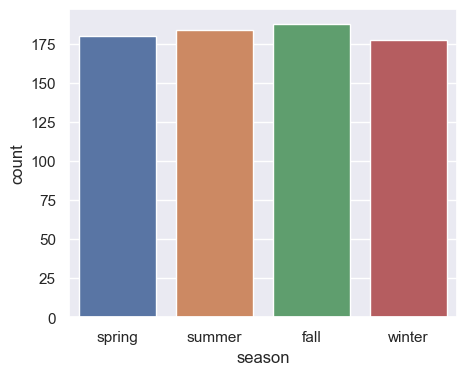

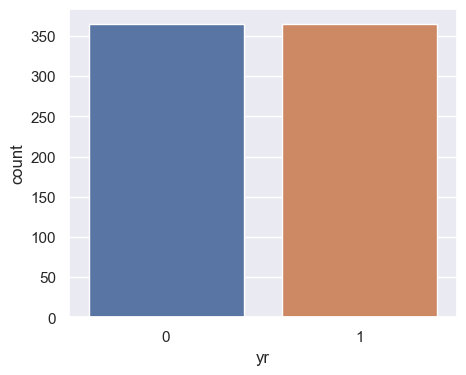

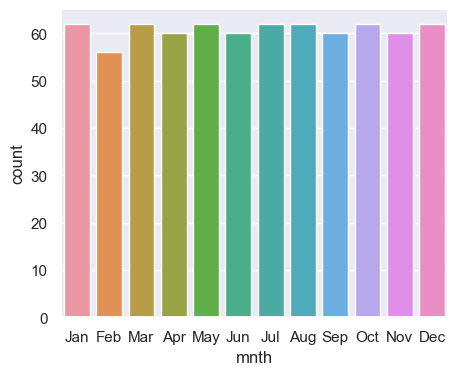

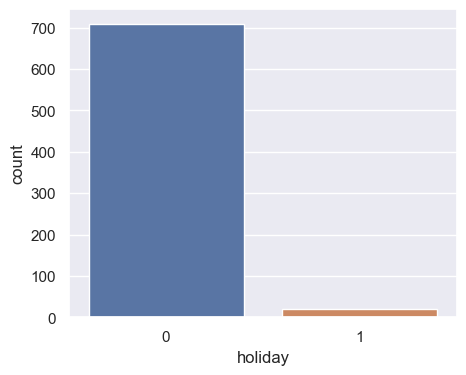

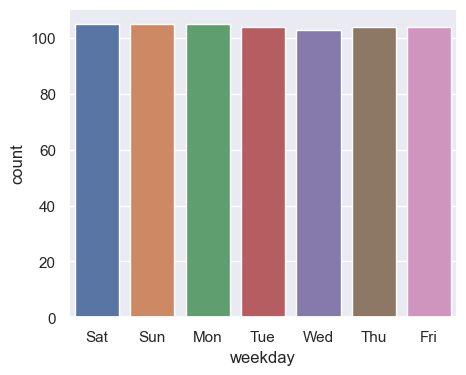

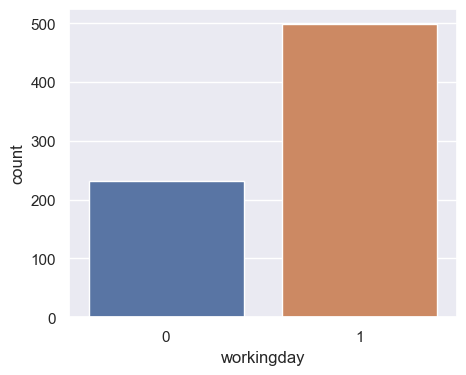

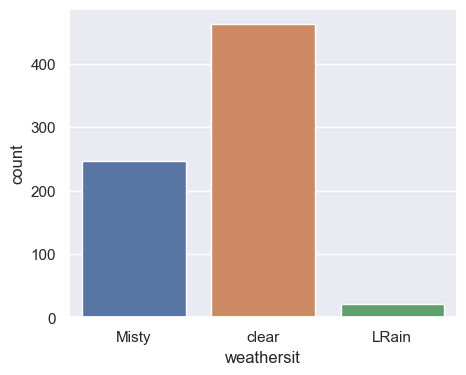

In [10]:
#Frequency of categorical variables

sns.set(rc={"figure.figsize":(5, 4)})
for i in cat_vars:
    sns.countplot(x = df[i])
    plt.show()

### Bivariant Analysis

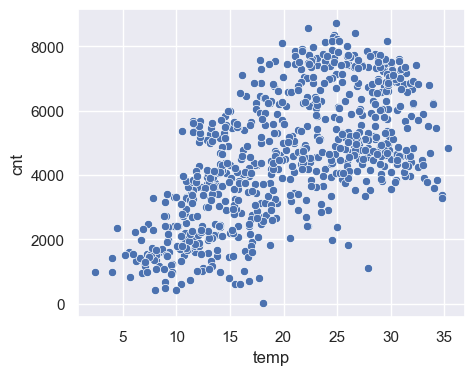

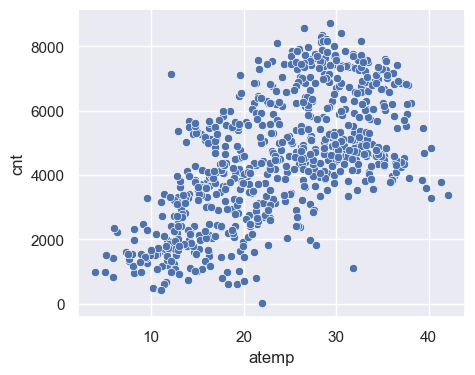

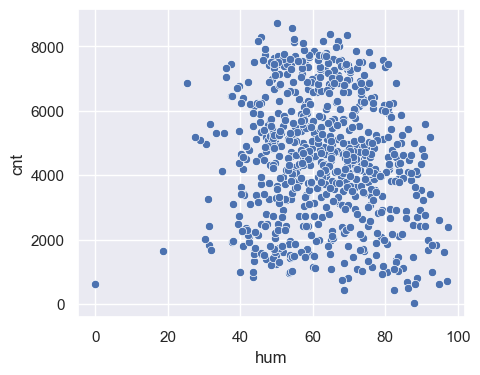

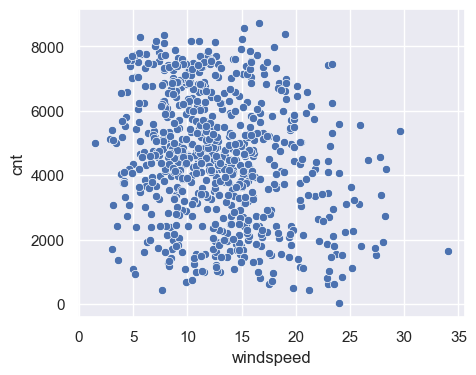

In [11]:
#Plotting Quantitative variable with target variable - cnt

sns.set(rc={"figure.figsize":(5, 4)})
for i in conti_vars:
    sns.scatterplot(x = df[i], y = df["cnt"])
    plt.show()


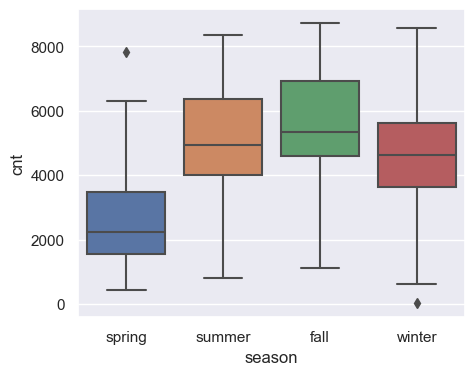

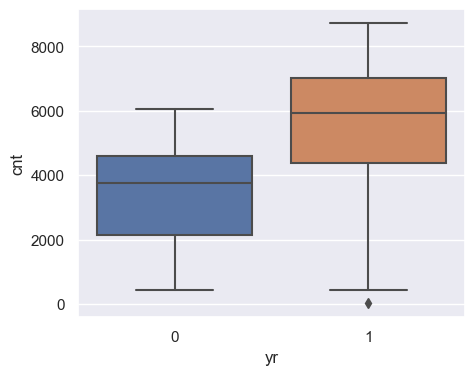

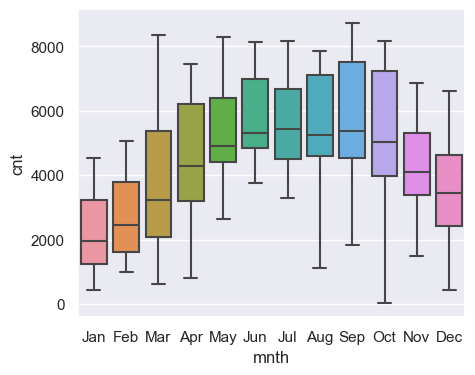

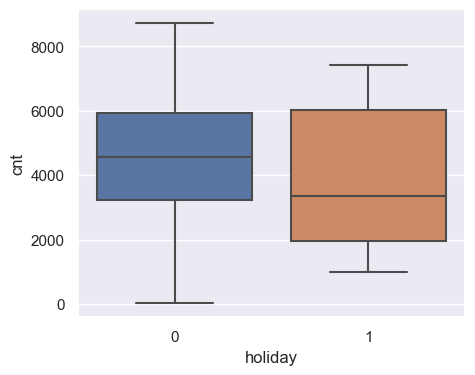

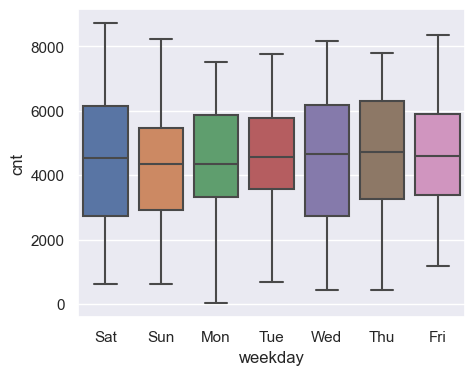

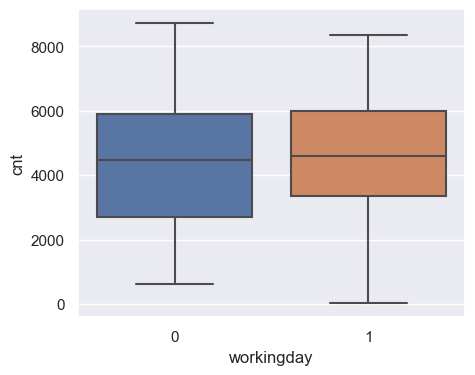

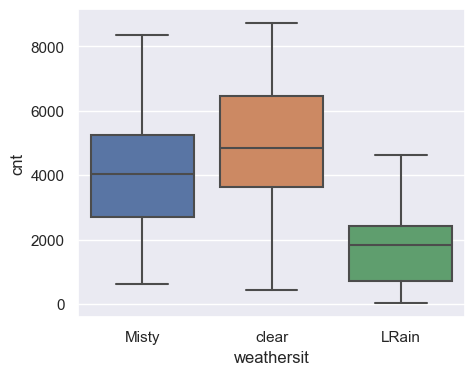

In [12]:
# Relationship between different categorical variable and target variable - cnt

sns.set(rc={"figure.figsize":(5, 4)})
for i in cat_vars:
    sns.boxplot(x = df[i], y = df['cnt'])
    plt.show()

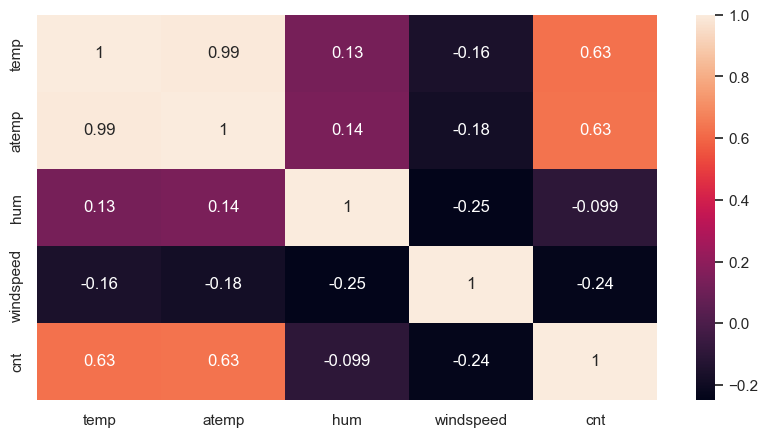

In [13]:
#Correlation between quantative variables

plt.figure(figsize = (10,5))
sns.heatmap(df[conti_vars+['cnt']].corr(),annot = True)
plt.show()

## Step 2: Preparing the Data

In [14]:
#Identifying levels in each categorical variables

df[cat_vars].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [15]:
#Creating dummy variables

dum_season = pd.get_dummies(df['season'], drop_first = True, dtype=int)

dum_mnth = pd.get_dummies(df['mnth'], drop_first=True, dtype=int)

dum_day = pd.get_dummies(df['weekday'], drop_first=True, dtype=int)

dum_WS = pd.get_dummies(df['weathersit'], drop_first = True, dtype=int)


In [16]:
#including dummy variables to dataframe

df = pd.concat([df,dum_season,dum_mnth,dum_day,dum_WS], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Misty,clear
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,1
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,1
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,1


In [17]:
#dropping original categorical columns from dataframe

df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1)


In [18]:
df.shape

(730, 30)

## Step 3: Splitting the Data into Training and Test Sets

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the features

We are using MIn-Max Scaling

In [20]:
scaler = MinMaxScaler()

# Apply scaler() to all the numerical/continuous variable of train set (i.e.except the categorical and 'dummy' variables)

df_train[conti_vars] = scaler.fit_transform(df_train[conti_vars])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Misty,clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,1,0


### Dividing into X and y sets for Model Building

In [21]:
#Train set

y_train = df_train.pop('cnt')
X_train = df_train


## Step 4: Building a Linear Model 

### Feature Selection using RFE method

In [22]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15) #out of 29 avaliable features, we have asked system to select top 15 features.

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True])

In [23]:
X_train.columns[selector.support_] #Names of columns selected using RFE

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Misty', 'clear'],
      dtype='object')

In [24]:
selected_features = X_train.columns[selector.support_]

In [25]:
X_train= X_train[selected_features]

In [26]:
#Adding constant term to the train set as statsmodels fits a regression line passing through the origin, by default.

import statsmodels.api as sm
X_train_sm= sm.add_constant(X_train)


In [27]:
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,Misty,clear
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [28]:
# Creating first fitted model - model1

model1= sm.OLS(y_train,X_train_sm)
res1= model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.31e-191
Time:                        22:35:02   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6828    420.055      0.099      0.921    -783.632     866.998
yr          2003.5240     69.550     28.807      0.000    1866.873    2140.175
holiday     -508.7381    233.568     -2.178      0.030    -967.646     -49.830
workingday   378.2822    100.057      3.781      0.000     181.693     574.872
temp        4431.4973    298.389     14.851      0.000    3845.228    5017.766
hum        -1344.7934    324.457     -4.145      0.000   -1982.280    -707.307
windspeed  -1616.3289    221.379     -7.301      0.000   -2051.289   -1181.369
spring      -441.6037    179.462     -2.461      0.014    -794.207     -89.001
summer       431.6424    129.004      3.346      0.001     178.177     685.107
winter       820.7507    149.808      5.479      0.000     526.411    1115.090
Jan         -298.3585    150.718     -1.980      0.048    -594.486      -2.231
Jul         -462.3542    156.871     -2.947      0.003    -770.570    -154.138
Sep          705.6663    143.010      4.934      0.000     424.684     986.648
Sat          466.9445    125.957      3.707      0.000     219.467     714.422
Misty       1659.7664    214.150      7.750      0.000    1239.010    2080.523
clear       2162.3728    226.178      9.560      0.000    1717.983    2606.763
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Checking VIF for features in first model

from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,2.097785
1,holiday,1.185134
2,workingday,5.421153
3,temp,22.832804
4,hum,25.637243
5,windspeed,4.684207
6,spring,5.687650
7,summer,3.196204
8,winter,4.136666
9,Jan,1.703345


In [30]:
#As VIF is higher than acceptable threshold of 5, dropping 'hum' and updating model

X_train_sm = X_train_sm.drop(["hum"], axis = 1)


In [31]:
#Updating the model - model2

model2= sm.OLS(y_train,X_train_sm)
res2= model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          7.33e-189
Time:                        22:35:02   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1004.2126    341.256     -2.943      0.003   -1674.701    -333.724
yr          2037.0675     70.197     29.019      0.000    1899.146    2174.989
holiday     -488.4777    237.302     -2.058      0.040    -954.721     -22.234
workingday   404.1942    101.480      3.983      0.000     204.809     603.579
temp        4109.7764    292.787     14.037      0.000    3534.517    4685.035
windspeed  -1358.2502    215.885     -6.292      0.000   -1782.415    -934.086
spring      -518.9473    181.383     -2.861      0.004    -875.322    -162.572
summer       376.8183    130.405      2.890      0.004     120.603     633.034
winter       692.7446    148.966      4.650      0.000     400.060     985.429
Jan         -338.5243    152.845     -2.215      0.027    -638.829     -38.220
Jul         -419.1439    159.061     -2.635      0.009    -731.663    -106.625
Sep          654.6655    144.789      4.522      0.000     370.189     939.142
Sat          507.9043    127.604      3.980      0.000     257.191     758.618
Misty       1817.5504    214.155      8.487      0.000    1396.785    2238.316
clear       2535.6933    210.833     12.027      0.000    2121.455    2949.932
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Checking VIF for model2

vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,96.732240
1,yr,1.023028
2,holiday,1.161911
3,workingday,1.872133
4,temp,3.624766
5,windspeed,1.113949
6,spring,5.028885
7,summer,2.613538
8,winter,3.447072
9,Jan,1.561121


In [33]:
#As VIF is higher than acceptable threshold of 5, dropping 'clear' and updating model

X_train_sm = X_train_sm.drop(["clear"], axis = 1)

In [34]:
#Updating the model - model3

model3= sm.OLS(y_train,X_train_sm)
res3= model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.51e-162
Time:                        22:35:02   Log-Likelihood:                -4180.0
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     496   BIC:                             8447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1456.1238    310.185      4.694      0.000     846.684    2065.563
yr          2085.4763     79.586     26.204      0.000    1929.109    2241.843
holiday     -421.8791    269.410     -1.566      0.118    -951.204     107.445
workingday   342.6995    115.096      2.978      0.003     116.564     568.835
temp        4241.3845    332.260     12.765      0.000    3588.573    4894.196
windspeed  -1609.9139    244.008     -6.598      0.000   -2089.330   -1130.498
spring      -462.8007    205.912     -2.248      0.025    -867.368     -58.233
summer       405.5561    148.064      2.739      0.006     114.645     696.467
winter       609.2587    168.984      3.605      0.000     277.245     941.272
Jan         -294.6143    173.523     -1.698      0.090    -635.544      46.316
Jul         -447.9067    180.612     -2.480      0.013    -802.765     -93.049
Sep          571.3951    164.236      3.479      0.001     248.711     894.079
Sat          444.5595    144.786      3.070      0.002     160.091     729.028
Misty       -598.5428     84.266     -7.103      0.000    -764.105    -432.981
==============================================================================
Omnibus:                      144.280   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.291
Skew:                          -1.254   Prob(JB):                    3.51e-117
Kurtosis:                       7.353   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#As p-value of 'holiday' is higher than threshold of 0.05, let's drop it

X_train_sm = X_train_sm.drop(["holiday"], axis = 1)

In [36]:
#Updating the model - model4

model4= sm.OLS(y_train,X_train_sm)
res4= model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.91e-163
Time:                        22:35:02   Log-Likelihood:                -4181.2
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     497   BIC:                             8444.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1396.1957    308.265      4.529      0.000     790.533    2001.859
yr          2086.7277     79.698     26.183      0.000    1930.141    2243.315
workingday   405.5320    108.033      3.754      0.000     193.275     617.789
temp        4242.1730    332.745     12.749      0.000    3588.413    4895.933
windspeed  -1616.2812    244.330     -6.615      0.000   -2096.328   -1136.234
spring      -469.2649    206.171     -2.276      0.023    -874.340     -64.190
summer       408.0414    148.272      2.752      0.006     116.724     699.359
winter       603.1295    169.186      3.565      0.000     270.722     935.537
Jan         -299.0330    173.753     -1.721      0.086    -640.414      42.348
Jul         -439.8142    180.801     -2.433      0.015    -795.043     -84.585
Sep          557.3023    164.229      3.393      0.001     234.634     879.970
Sat          508.1045    139.186      3.651      0.000     234.640     781.569
Misty       -595.0375     84.359     -7.054      0.000    -760.782    -429.293
==============================================================================
Omnibus:                      144.977   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.039
Skew:                          -1.262   Prob(JB):                    2.42e-117
Kurtosis:                       7.348   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#As p-value of 'Jan' is higher than threshold of 0.05, we will drop it and update the model

X_train_sm = X_train_sm.drop(["Jan"], axis = 1)

In [38]:
#Updating the model - model5

model5= sm.OLS(y_train,X_train_sm)
res5= model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.25e-163
Time:                        22:35:02   Log-Likelihood:                -4182.8
No. Observations:                 510   AIC:                             8390.
Df Residuals:                     498   BIC:                             8440.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1272.5041    300.360      4.237      0.000     682.376    1862.632
yr          2080.9105     79.783     26.082      0.000    1924.157    2237.663
workingday   405.0295    108.245      3.742      0.000     192.356     617.702
temp        4389.1679    322.229     13.621      0.000    3756.072    5022.264
windspeed  -1560.5468    242.651     -6.431      0.000   -2037.292   -1083.801
spring      -512.5090    205.037     -2.500      0.013    -915.353    -109.665
summer       432.1335    147.900      2.922      0.004     141.548     722.719
winter       650.7619    167.235      3.891      0.000     322.189     979.335
Jul         -452.9980    180.994     -2.503      0.013    -808.605     -97.391
Sep          560.9342    164.538      3.409      0.001     237.660     884.209
Sat          506.2187    139.455      3.630      0.000     232.226     780.212
Misty       -602.3111     84.419     -7.135      0.000    -768.172    -436.450
==============================================================================
Omnibus:                      144.444   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.793
Skew:                          -1.257   Prob(JB):                    7.43e-117
Kurtosis:                       7.341   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Checking VIF again

vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,57.711122
1,yr,1.017728
2,workingday,1.640417
3,temp,3.381199
4,windspeed,1.083797
5,spring,4.948918
6,summer,2.589074
7,winter,3.345744
8,Jul,1.479966
9,Sep,1.280342


In [40]:
#Let us drop one more variable to see if the model can be improved; dropping 'spring' which has highest VIF amoung others.

X_train_sm = X_train_sm.drop(["spring"], axis = 1)


In [41]:
#Updating the model - model6

model6= sm.OLS(y_train,X_train_sm)
res6= model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.94e-163
Time:                        22:35:02   Log-Likelihood:                -4185.9
No. Observations:                 510   AIC:                             8394.
Df Residuals:                     499   BIC:                             8440.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        673.9635    182.271      3.698      0.000     315.850    1032.077
yr          2070.2180     80.086     25.850      0.000    1912.870    2227.566
workingday   412.9434    108.766      3.797      0.000     199.248     626.639
temp        4990.3019    215.589     23.147      0.000    4566.728    5413.876
windspeed  -1605.0865    243.265     -6.598      0.000   -2083.036   -1127.137
summer       690.4571    106.357      6.492      0.000     481.495     899.419
winter       983.4095    101.808      9.659      0.000     783.384    1183.435
Jul         -362.0193    178.227     -2.031      0.043    -712.187     -11.852
Sep          676.1391    158.780      4.258      0.000     364.180     988.098
Sat          514.4288    140.148      3.671      0.000     239.076     789.781
Misty       -597.3964     84.839     -7.042      0.000    -764.082    -430.711
==============================================================================
Omnibus:                      136.197   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.015
Skew:                          -1.212   Prob(JB):                    2.87e-101
Kurtosis:                       6.989   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping one additional feature did not harm the accuracy of model as much however we have reduced complexity of model a bit.

In [42]:
#Dropping 'Jul' which has highest p-value amoung others, to see model's performance

X_train_sm = X_train_sm.drop(["Jul"], axis = 1)

In [43]:
#Updating the model - model7

model7= sm.OLS(y_train,X_train_sm)
res7= model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.01e-163
Time:                        22:35:02   Log-Likelihood:                -4188.0
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     500   BIC:                             8438.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        706.7565    182.121      3.881      0.000     348.939    1064.574
yr          2076.1265     80.283     25.860      0.000    1918.393    2233.860
workingday   418.7799    109.067      3.840      0.000     204.493     633.067
temp        4793.3963    193.166     24.815      0.000    4413.879    5172.914
windspeed  -1598.8911    244.005     -6.553      0.000   -2078.293   -1119.490
summer       760.1966    100.977      7.528      0.000     561.806     958.587
winter      1020.5705    100.463     10.159      0.000     823.188    1217.953
Sep          759.4484    153.870      4.936      0.000     457.138    1061.759
Sat          515.2638    140.585      3.665      0.000     239.055     791.473
Misty       -588.0608     84.979     -6.920      0.000    -755.020    -421.102
==============================================================================
Omnibus:                      137.384   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.564
Skew:                          -1.229   Prob(JB):                    1.61e-100
Kurtosis:                       6.947   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Checking VIF again

vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,20.866416
1,yr,1.013463
2,workingday,1.637870
3,temp,1.194958
4,windspeed,1.077783
5,summer,1.186857
6,winter,1.187420
7,Sep,1.101156
8,Sat,1.627666
9,Misty,1.023971


Dropping another feature did not harm the model as much but has helped in reducing the complexity of the model to 8 features. Hence we go ahead with this.

#### We see, the VIFs and p-values both are within an acceptable range, hence we consider this as  our final model. 

### Step 5: Residual Analysis of the Train Data

#### Plotting histogram of the error terms to see its distribution. One of the major assumptions of linear regression is the error terms are normally distributed.

In [45]:
y_train_cnt = res7.predict(X_train_sm)

Text(0.5, 0, 'Errors')

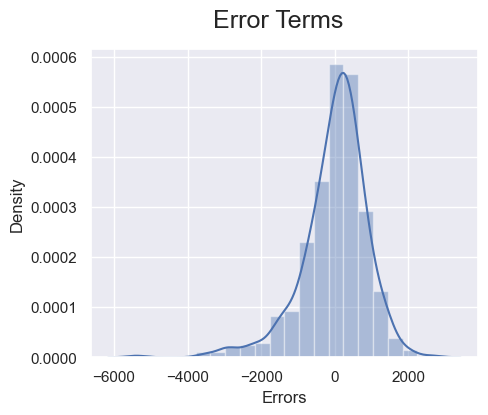

In [46]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label

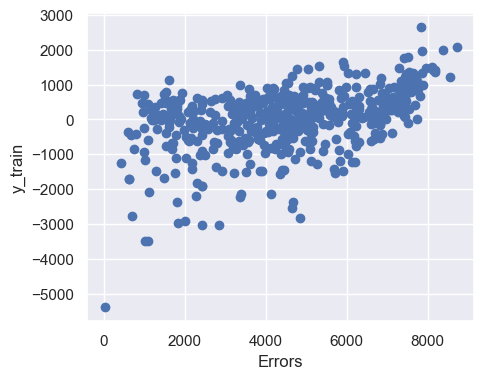

In [47]:
#PLotting Error term vs y-train
Errors = y_train-y_train_cnt

plt.scatter(y_train, Errors)
               
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('y_train')
plt.show()


## Step 6: Making Predictions Using the Final Model

In [48]:
# Apply scaling to all the numerical/continuous variable of test set (i.e.except the categorical and 'dummy' variables)

df_test[conti_vars] = scaler.fit_transform(df_test[conti_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Misty,clear
184,0,1,0,0.837241,0.778767,0.534223,0.149393,6043,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,6211,0,1,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.496221,0.492359,0.777843,0.443398,2659,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,4780,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.821739,0.749249,0.070765,0.682387,4968,0,1,...,0,0,0,0,0,1,0,0,0,1


In [49]:
#Dividing into X and y Test set

y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
#Dropping the features based on RFE done on train-set
X_test= X_test[selected_features]

#Adding constant to test set
X_test_sm= sm.add_constant(X_test)

#Dropping the features based on manual selection done on train-set
X_test_sm = X_test_sm.drop(["hum", "clear", "holiday", "Jan", "spring", "Jul"], axis = 1)
X_test_sm.head()

,const,yr,workingday,temp,windspeed,summer,winter,Sep,Sat,Misty
184,1.0,0,0,0.837241,0.149393,0,0,0,0,1
535,1.0,1,1,0.911423,0.231142,1,0,0,0,0
299,1.0,0,1,0.496221,0.443398,0,1,0,0,1
221,1.0,0,1,0.890387,0.449707,0,0,0,0,0
152,1.0,0,1,0.821739,0.682387,1,0,0,0,0


In [51]:
# Making predictions using the final model

y_pred_cnt = res7.predict(X_test_sm)

## Step 7: Model Evaluation

#### Plotting the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

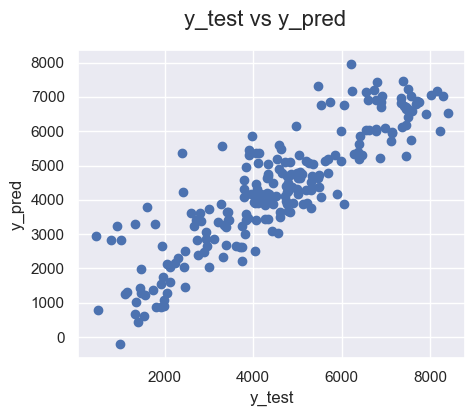

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_cnt)
fig.suptitle('y_test vs y_pred', fontsize = 16)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_pred', fontsize = 12)   

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_cnt)

0.7503926982801375

#### The R-squared of final model built using Training Set is 0.791 and for Test Set, R-squared is 0.75

#### Here is the equation of best fitted line derived:

$ cnt = 706.7565 + 2076.1265\times yr + 418.7799\times workingday + 4793.3963\times temp - 1598.8911\times windspeed + 760.1966\times summer + 1020.5705\times winter + 759.4484\times Sep + 515.2638\times Sat - 588.06081\times Misty$